In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotx
from labellines import labelLines

In [2]:
def P_f_normalized(f_he_div, eta_he):
    return (1 - 1/(1 + eta_he/(2*f_he_div)))

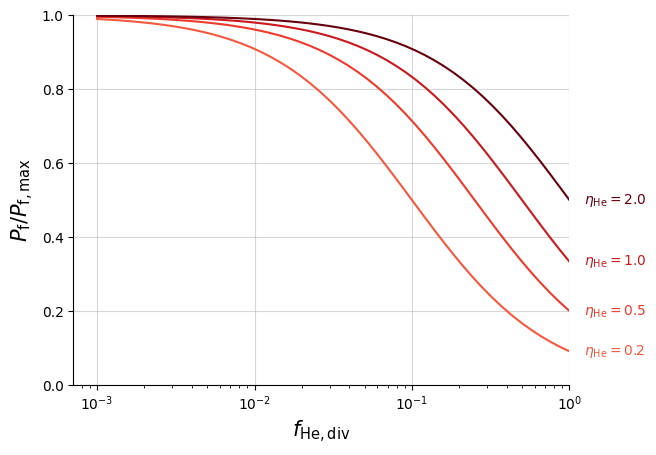

In [3]:
f_he_div = np.logspace(-3, 0)

norm = colors.Normalize(vmin=-2, vmax=2)

for eta_he in [0.2, 0.5, 1, 2]:
    pf = P_f_normalized(f_he_div, eta_he)
    
    plt.plot(f_he_div, pf, label="$\eta_\mathrm{He} = $" + f"{eta_he:.1f}", color=cm.Reds(norm(eta_he)))

plt.xscale("log")
plt.xlabel("$f_\mathrm{He,div}$", fontsize=15)
plt.ylabel("$P_\mathrm{f}/P_\mathrm{f, max}$", fontsize=15)
plt.grid(alpha=0.5)
plt.ylim(0, 1)
plt.xlim(right=1)

matplotx.line_labels()
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)


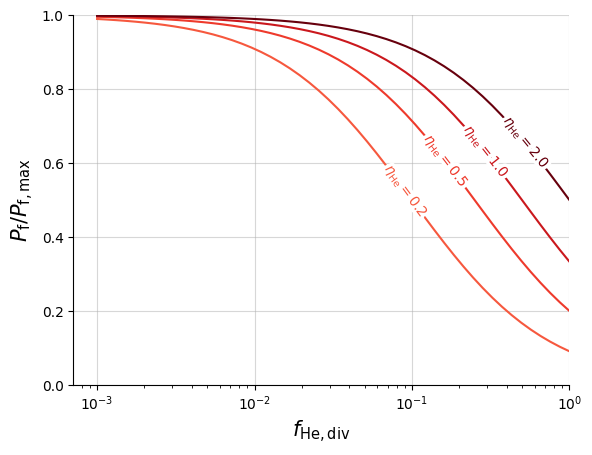

In [4]:
f_he_div = np.logspace(-3, 0)

norm = colors.Normalize(vmin=-2, vmax=2)

for eta_he in [0.2, 0.5, 1, 2]:
    pf = P_f_normalized(f_he_div, eta_he)
    
    plt.plot(f_he_div, pf, label="$\eta_\mathrm{He} = $" + f"{eta_he:.1f}", color=cm.Reds(norm(eta_he)))

plt.xscale("log")
plt.xlabel("$f_\mathrm{He,div}$", fontsize=15)
plt.ylabel("$P_\mathrm{f}/P_\mathrm{f, max}$", fontsize=15)
plt.grid(alpha=0.5)
plt.ylim(0, 1)
plt.xlim(right=1)

labelLines(plt.gca().get_lines(), zorder=2.5)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

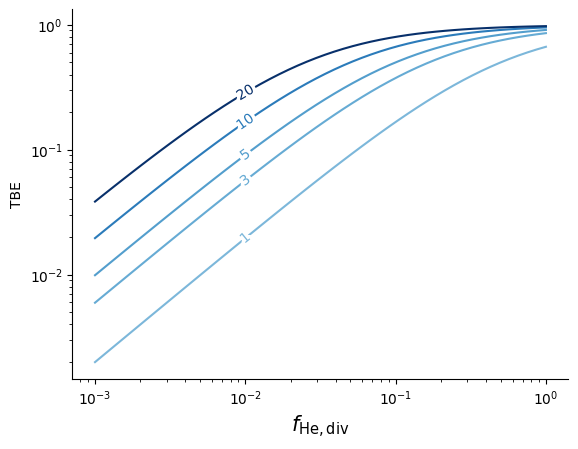

In [24]:
def compute_TBE(f_he_div, sigma):
    return (1/(2*f_he_div*sigma)+1)**-1


norm = colors.Normalize(vmin=-15, vmax=20)

f_he_div = np.logspace(-3, 0)
for sigma in [1, 3, 5, 10, 20]:
    plt.loglog(f_he_div, compute_TBE(f_he_div, sigma), label=sigma, color=cm.Blues(norm(sigma)))

labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[1e-2, 1e-2, 1e-2, 1e-2, 1e-2])

plt.xlabel("$f_\mathrm{He,div}$", fontsize=15)
plt.ylabel("TBE")
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

In [5]:
import sympy as sp

In [7]:
P_f = sp.Symbol("P_f")
P_f_max = sp.Symbol("P_{f, max}")
f_dil = sp.Symbol("f_{dil}")
f_he_div = sp.Symbol("f_{He, div}")
f_alpha_core = sp.Symbol(r"f_{\alpha, core}")
eta_he = sp.Symbol("\eta_{He}")
n_alpha = sp.Symbol(r"n_{\alpha}")
n_q_core = sp.Symbol(r"n_{Q, core}")
n_e = sp.Symbol(r"n_{e}")

# enrichment : eta_he = f_he_div/f_alpha_core
enrichment = sp.Eq(eta_he, f_he_div/f_alpha_core)

# f_alpha_core expression
f_alpha_core_expr = sp.Eq(f_alpha_core, n_alpha/n_q_core)

# charge neutrality
charge_neutrality = sp.Eq(n_e, n_q_core + 2*n_alpha)

# ash dilution fraction
ash_dilution_fraction = sp.Eq(f_dil, n_alpha/n_e)

# substitute ash dil. and charge neutrality to get new expr for f_alpha_core
f_alpha_core_expr = f_alpha_core_expr.subs(n_q_core, sp.solve(charge_neutrality, n_q_core)[0]).subs(n_e, sp.solve(ash_dilution_fraction, n_e)[0])

# Pf/Pfmax = (1 - 2 f_dil)**2
power_ratio = sp.Eq(P_f/P_f_max, (1 - 2 *f_dil)**2)

# Substitute f_dil and f_alpha_core in power ratio
new_power_ratio = power_ratio.subs(f_dil, sp.solve(f_alpha_core_expr, f_dil)[0]).subs(f_alpha_core, sp.solve(enrichment, f_alpha_core)[0])

new_power_ratio.simplify()

Eq(P_f/P_{f, max}, \eta_{He}**2/(\eta_{He} + 2*f_{He, div})**2)